# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

## Part 0: Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

In [2]:
# load in the data
azdias = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_AZDIAS_052018.csv', sep=';')
customers = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_CUSTOMERS_052018.csv', sep=';')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Be sure to add in a lot more cells (both markdown and code) to document your
# approach and findings!

In [4]:
azdias.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [5]:
customers.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


**Cleaning**

Handle the 'DtypeWarning: Columns (18,19) have mixed types' warning -<br>
saving all values in the columns as string and removing the '.0'.

In [6]:
azdias.columns[18:20]

Index(['CAMEO_DEUG_2015', 'CAMEO_INTL_2015'], dtype='object')

In [7]:
print(azdias['CAMEO_DEUG_2015'].unique())
print(azdias['CAMEO_INTL_2015'].unique())

[nan 8.0 4.0 2.0 6.0 1.0 9.0 5.0 7.0 3.0 '4' '3' '7' '2' '8' '9' '6' '5'
 '1' 'X']
[nan 51.0 24.0 12.0 43.0 54.0 22.0 14.0 13.0 15.0 33.0 41.0 34.0 55.0 25.0
 23.0 31.0 52.0 35.0 45.0 44.0 32.0 '22' '24' '41' '12' '54' '51' '44' '35'
 '23' '25' '14' '34' '52' '55' '31' '32' '15' '13' '43' '33' '45' 'XX']


In [8]:
def clean_df(df, cols):
    for col in cols:
        df[col] = df[col].str.replace('.0', '')
        df[col].unique()
    return df    

cols = ['CAMEO_INTL_2015', 'CAMEO_INTL_2015']

azdias_clean = clean_df(azdias, cols)        
customers_clean = clean_df(customers, cols)        

In [9]:
# check
print(azdias_clean['CAMEO_INTL_2015'].unique())
print(customers_clean['CAMEO_INTL_2015'].unique())

[nan '22' '24' '41' '12' '54' '51' '44' '35' '23' '25' '14' '34' '52' '55'
 '31' '32' '15' '13' '43' '33' '45' 'XX']
[nan '45' '25' '55' '51' '14' '54' '43' '22' '15' '24' '35' '23' '12' '44'
 '41' '52' '31' '13' '34' '32' '33' 'XX']


**Save cleaned dataset**

In [10]:
azdias_clean.to_csv('azdias_clean.csv')
customers_clean.to_csv('customers_clean.csv')

**Identify columns with more data**

In [51]:
def miss_share(df, pct=101):
    for col in df.columns:
        miss_share = df[df[col]==0][col].count()/df.shape[0] + \
                     df[df[col]==-1][col].count()/df.shape[0] + \
                     df[col].isna().sum()/df.shape[0]    
        if miss_share*100 < pct:
            print(col, miss_share)
    return   

miss_share(customers_clean, 25)    

LNR 0.0
AKT_DAT_KL 0.243128169808
CJT_GESAMTTYP 0.0167647611295
CJT_KATALOGNUTZER 0.0167647611295
CJT_TYP_1 0.0167647611295
CJT_TYP_2 0.0167647611295
CJT_TYP_3 0.0167647611295
CJT_TYP_4 0.0167647611295
CJT_TYP_5 0.0167647611295
CJT_TYP_6 0.0167647611295
D19_BANKEN_DATUM 0.0
D19_BANKEN_OFFLINE_DATUM 0.0
D19_BANKEN_ONLINE_DATUM 0.0
D19_GESAMT_DATUM 0.0
D19_GESAMT_OFFLINE_DATUM 0.0
D19_GESAMT_ONLINE_DATUM 0.0
D19_KONSUMTYP 0.248872957235
D19_KONSUMTYP_MAX 0.0
D19_LETZTER_KAUF_BRANCHE 0.248872957235
D19_TELKO_DATUM 0.0
D19_TELKO_OFFLINE_DATUM 0.0
D19_TELKO_ONLINE_DATUM 0.0
D19_VERSAND_DATUM 0.0
D19_VERSAND_OFFLINE_DATUM 0.0
D19_VERSAND_ONLINE_DATUM 0.0
D19_VERSI_DATUM 0.0
D19_VERSI_OFFLINE_DATUM 0.0
D19_VERSI_ONLINE_DATUM 0.0
EINGEZOGENAM_HH_JAHR 0.243128169808
FINANZ_ANLEGER 0.0
FINANZ_HAUSBAUER 0.0
FINANZ_MINIMALIST 0.0
FINANZ_SPARER 0.0
FINANZ_UNAUFFAELLIGER 0.0
FINANZ_VORSORGER 0.0
FINANZTYP 0.0
GFK_URLAUBERTYP 0.0167647611295
HH_EINKOMMEN_SCORE 0.0154864024378
KOMBIALTER 0.0
KONSUMNAE

**Selected Features:**

ALTERSKATEGORIE_GROB - age classification through prename analysis<br> 
ANREDE_KZ - gender<br>
EWDICHTE - density of inhabitants per square kilometer<br>
INNENSTADT - distance to the city centre<br>
LP_STATUS_GROB	- social status rough

In [14]:
feat_cols = ['ALTERSKATEGORIE_GROB','ANREDE_KZ', 'EWDICHTE', 'INNENSTADT', 'LP_STATUS_GROB']

In [15]:
azdias_clean_sub = azdias_clean[feat_cols]
customers_clean_sub = customers_clean[feat_cols]

In [16]:
azdias_clean_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 5 columns):
ALTERSKATEGORIE_GROB    891221 non-null int64
ANREDE_KZ               891221 non-null int64
EWDICHTE                797481 non-null float64
INNENSTADT              797481 non-null float64
LP_STATUS_GROB          886367 non-null float64
dtypes: float64(3), int64(2)
memory usage: 34.0 MB


In [17]:
customers_clean_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191652 entries, 0 to 191651
Data columns (total 5 columns):
ALTERSKATEGORIE_GROB    191652 non-null int64
ANREDE_KZ               191652 non-null int64
EWDICHTE                141693 non-null float64
INNENSTADT              141693 non-null float64
LP_STATUS_GROB          188439 non-null float64
dtypes: float64(3), int64(2)
memory usage: 7.3 MB


In [18]:
azdias_clean_sub.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,EWDICHTE,INNENSTADT,LP_STATUS_GROB
0,2,1,NaN,NaN,1.0
1,1,2,3.0,8.0,1.0
2,3,2,4.0,4.0,2.0
3,4,2,2.0,6.0,4.0
4,3,1,5.0,1.0,2.0


In [19]:
azdias_clean_sub[feat_cols] = azdias_clean_sub[feat_cols].astype('str')
customers_clean_sub[feat_cols] = customers_clean_sub[feat_cols].astype('str')

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [20]:
azdias_clean_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 5 columns):
ALTERSKATEGORIE_GROB    891221 non-null object
ANREDE_KZ               891221 non-null object
EWDICHTE                891221 non-null object
INNENSTADT              891221 non-null object
LP_STATUS_GROB          891221 non-null object
dtypes: object(5)
memory usage: 34.0+ MB


In [21]:
customers_clean_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191652 entries, 0 to 191651
Data columns (total 5 columns):
ALTERSKATEGORIE_GROB    191652 non-null object
ANREDE_KZ               191652 non-null object
EWDICHTE                191652 non-null object
INNENSTADT              191652 non-null object
LP_STATUS_GROB          191652 non-null object
dtypes: object(5)
memory usage: 7.3+ MB


In [22]:
azdias_clean_sub = clean_df(azdias_clean_sub, feat_cols)        
customers_clean_sub = clean_df(customers_clean_sub, feat_cols)  

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
for col in feat_cols:
    print(col, np.sort(azdias_clean_sub[col].unique()))

ALTERSKATEGORIE_GROB ['1' '2' '3' '4' '9']
ANREDE_KZ ['1' '2']
EWDICHTE ['1' '2' '3' '4' '5' '6' 'nan']
INNENSTADT ['1' '2' '3' '4' '5' '6' '7' '8' 'nan']
LP_STATUS_GROB ['1' '2' '3' '4' '5' 'nan']


In [24]:
for col in feat_cols:
    print(col, np.sort(customers_clean_sub[col].unique()))

ALTERSKATEGORIE_GROB ['1' '2' '3' '4' '9']
ANREDE_KZ ['1' '2']
EWDICHTE ['1' '2' '3' '4' '5' '6' 'nan']
INNENSTADT ['1' '2' '3' '4' '5' '6' '7' '8' 'nan']
LP_STATUS_GROB ['1' '2' '3' '4' '5' 'nan']


In [27]:
for col in feat_cols:
    print(col, np.sort(customers_clean_sub[col].unique()))

ALTERSKATEGORIE_GROB ['1' '2' '3' '4' '9']
ANREDE_KZ ['1' '2']
EWDICHTE ['1' '2' '3' '4' '5' '6' 'nan']
INNENSTADT ['1' '2' '3' '4' '5' '6' '7' '8' 'nan']
LP_STATUS_GROB ['1' '2' '3' '4' '5' 'nan']


In [28]:
def repl_nan(df):
    for col in df.columns:
        df[col] = df[col].replace('nan', '0')
    return df    

azdias_clean_sub = repl_nan(azdias_clean_sub)
customers_clean_sub = repl_nan(customers_clean_sub)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
azdias_clean_sub.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,EWDICHTE,INNENSTADT,LP_STATUS_GROB
0,2,1,0,0,1
1,1,2,3,8,1
2,3,2,4,4,2
3,4,2,2,6,4
4,3,1,5,1,2


In [30]:
customers_clean_sub.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,EWDICHTE,INNENSTADT,LP_STATUS_GROB
0,4,1,2,4,5
1,4,1,0,0,0
2,4,2,4,1,5
3,4,1,1,7,4
4,3,1,4,4,1


In [31]:
customers_clean_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191652 entries, 0 to 191651
Data columns (total 5 columns):
ALTERSKATEGORIE_GROB    191652 non-null object
ANREDE_KZ               191652 non-null object
EWDICHTE                191652 non-null object
INNENSTADT              191652 non-null object
LP_STATUS_GROB          191652 non-null object
dtypes: object(5)
memory usage: 7.3+ MB


In [32]:
def int_feat_cols(df, feat_cols):
    df[feat_cols] = df[feat_cols].astype(int)
    
    return df

azdias_clean_sub = int_feat_cols(azdias_clean_sub, feat_cols)
customers_clean_sub = int_feat_cols(customers_clean_sub, feat_cols)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [33]:
azdias_clean_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 5 columns):
ALTERSKATEGORIE_GROB    891221 non-null int64
ANREDE_KZ               891221 non-null int64
EWDICHTE                891221 non-null int64
INNENSTADT              891221 non-null int64
LP_STATUS_GROB          891221 non-null int64
dtypes: int64(5)
memory usage: 34.0 MB


In [34]:
customers_clean_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191652 entries, 0 to 191651
Data columns (total 5 columns):
ALTERSKATEGORIE_GROB    191652 non-null int64
ANREDE_KZ               191652 non-null int64
EWDICHTE                191652 non-null int64
INNENSTADT              191652 non-null int64
LP_STATUS_GROB          191652 non-null int64
dtypes: int64(5)
memory usage: 7.3 MB


In [52]:
miss_share(azdias_clean_sub)  

ALTERSKATEGORIE_GROB 0.0
ANREDE_KZ 0.0
EWDICHTE 0.105181543074
INNENSTADT 0.105181543074
LP_STATUS_GROB 0.00544646052999


In [53]:
miss_share(customers_clean_sub)  

ALTERSKATEGORIE_GROB 0.0
ANREDE_KZ 0.0
EWDICHTE 0.260675599524
INNENSTADT 0.260675599524
LP_STATUS_GROB 0.0167647611295


In [97]:
azdias_clean_sub.to_csv('azdias_clean_sub.csv', index=False)
customers_clean_sub.to_csv('customers_clean_sub.csv', index=False)

## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

In [98]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [99]:
azdias_clean_sub = pd.read_csv('azdias_clean_sub.csv')
customers_clean_sub = pd.read_csv('customers_clean_sub.csv')

In [100]:
azdias_clean_sub.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,EWDICHTE,INNENSTADT,LP_STATUS_GROB,cluster
0,2,1,0,0,1,2
1,1,2,3,8,1,0
2,3,2,4,4,2,1
3,4,2,2,6,4,0
4,3,1,5,1,2,1


In [101]:
customers_clean_sub.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,EWDICHTE,INNENSTADT,LP_STATUS_GROB,cluster
0,4,1,2,4,5,2
1,4,1,0,0,0,1
2,4,2,4,1,5,0
3,4,1,1,7,4,2
4,3,1,4,4,1,0


In [102]:
def doPCA(df):
    pca = PCA(n_components=2)
    pca.fit(df)
    return pca 

In [103]:
azdias_pca = doPCA(azdias_clean_sub)
customers_pca = doPCA(customers_clean_sub)

In [104]:
print(azdias_pca.explained_variance_ratio_)
print(customers_pca.explained_variance_ratio_)

[ 0.46571339  0.29632426]
[ 0.5717192   0.25749322]


In [105]:
azdias_cp1 = azdias_pca.components_[0]
azdias_cp2 = azdias_pca.components_[1]
customers_cp1 = customers_pca.components_[0]
customers_cp2 = customers_pca.components_[1]

In [106]:
t_azdias = azdias_pca.transform(azdias_clean_sub)
t_customers = customers_pca.transform(customers_clean_sub)

In [107]:
customers_cp1, customers_cp2

(array([ 0.23971452, -0.02808024,  0.44886866,  0.82567097,  0.230398  ,
         0.07382135]),
 array([ 0.09244877,  0.00328649,  0.82591199, -0.40593648, -0.13641422,
        -0.35485004]))

In [108]:
azdias_cp1, azdias_cp2

(array([ 0.06079093, -0.00265816, -0.28222622,  0.89419382,  0.26016326,
        -0.22221217]),
 array([-0.02855028, -0.0021895 , -0.92258248, -0.32119909,  0.18989506,
         0.09376922]))

In [109]:
t_azdias

array([[-3.36205004,  4.44058919],
       [ 3.32579713, -1.0579286 ],
       [-0.37367142, -0.46915102],
       ..., 
       [ 2.14058989,  0.66839683],
       [-1.31721081, -2.44492098],
       [ 3.79305429, -0.21880748]])

In [110]:
len(t_azdias), len(t_customers)

(891221, 191652)

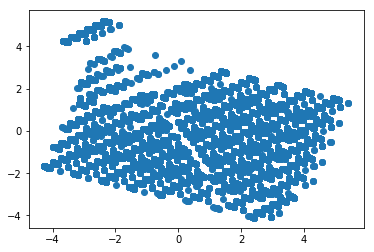

In [111]:
plt.scatter(t_azdias[:,0],t_azdias[:,1]);

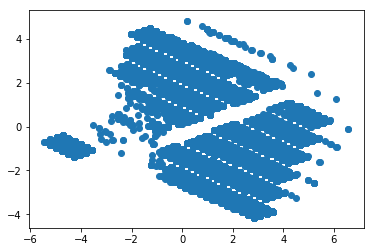

In [112]:
plt.scatter(t_customers[:,0],t_customers[:,1]);

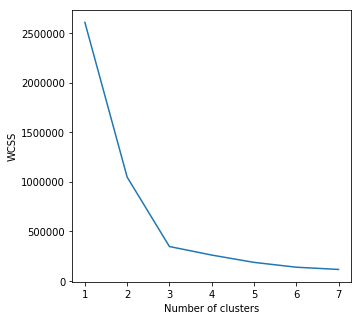

In [113]:
wcss = []
for i in range(1,8):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(t_customers)
   wcss.append(model.inertia_)
plt.figure(figsize=(5,5))
plt.plot(range(1,8), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

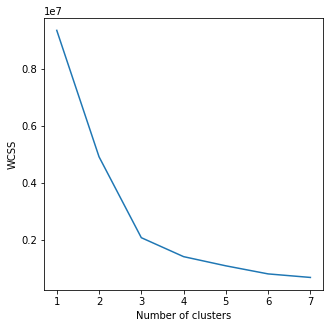

In [114]:
wcss = []
for i in range(1,8):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(t_azdias)
   wcss.append(model.inertia_)
plt.figure(figsize=(5,5))
plt.plot(range(1,8), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [115]:
#Initialize the class object
kmeans = KMeans(n_clusters=3)
 
#predict the labels of clusters.
azdias_label = kmeans.fit_predict(t_azdias)
customers_label = kmeans.fit_predict(t_customers)
    
print(azdias_label)
print(customers_label)

[0 1 2 ..., 1 2 1]
[0 1 2 ..., 0 2 0]


In [116]:
print(len(t_azdias))
print(len(t_customers))

891221
191652


In [117]:
print(len(azdias_label))
print(len(customers_label))

891221
191652


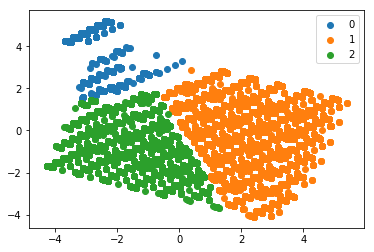

In [118]:
u_labels = np.unique(azdias_label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(t_azdias[azdias_label == i , 0] , t_azdias[azdias_label == i , 1] , label = i)
plt.legend()
plt.show()

In [119]:
u_labels

array([0, 1, 2], dtype=int32)

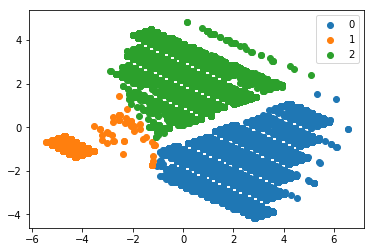

In [120]:
u_labels = np.unique(customers_label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(t_customers[customers_label == i , 0] , t_customers[customers_label == i , 1] , label = i)
plt.legend()
plt.show()

In [121]:
azdias_clean_sub['cluster'] = azdias_label
customers_clean_sub['cluster'] = customers_label

In [122]:
azdias_clean_sub.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,EWDICHTE,INNENSTADT,LP_STATUS_GROB,cluster
0,2,1,0,0,1,0
1,1,2,3,8,1,1
2,3,2,4,4,2,2
3,4,2,2,6,4,1
4,3,1,5,1,2,2


**Clusters proportions**

azdias_clean_sub.groupby('cluster')['ALTERSKATEGORIE_GROB'].count()/azdias_clean_sub.shape[0]*100

In [123]:
customers_clean_sub.groupby('cluster')['ALTERSKATEGORIE_GROB'].count()/customers_clean_sub.shape[0]*100

cluster
0    38.235969
1    26.089996
2    35.674034
Name: ALTERSKATEGORIE_GROB, dtype: float64

**ALTERSKATEGORIE_GROB - Age Group**

1 &nbsp;&nbsp;&nbsp; < 30 years<br>
2 &nbsp;&nbsp;&nbsp; 30 - 45 years<br>
3 &nbsp;&nbsp;&nbsp; 46 - 60 years<br>
4 &nbsp;&nbsp;&nbsp; > 60 years<br>
9 &nbsp;&nbsp;&nbsp; uniformly distributed<br>

**Age Groups proportion in the complete data**

In [124]:
azdias_clean_sub['ALTERSKATEGORIE_GROB'].value_counts(sort=False)/azdias_clean_sub.shape[0]*100

1    16.032724
2    17.774491
3    40.229416
4    25.640105
9     0.323264
Name: ALTERSKATEGORIE_GROB, dtype: float64

In [125]:
customers_clean_sub['ALTERSKATEGORIE_GROB'].value_counts(sort=False)/customers_clean_sub.shape[0]*100

1    14.811742
2     9.823534
3    30.453113
4    44.786384
9     0.125227
Name: ALTERSKATEGORIE_GROB, dtype: float64

**Age Groups proportion in clusters**

In [126]:
azdias_clean_sub.groupby('cluster')['ALTERSKATEGORIE_GROB'].value_counts(sort=False)\
                  /azdias_clean_sub.groupby('cluster')['ALTERSKATEGORIE_GROB'].count()*100

cluster  ALTERSKATEGORIE_GROB
0        1                       19.754055
         2                       22.790205
         3                       51.457649
         4                        5.915403
         9                        0.082688
1        1                       13.780315
         2                       15.695225
         3                       39.116061
         4                       31.092360
         9                        0.316039
2        1                       17.534581
         2                       18.773271
         3                       38.669007
         4                       24.633125
         9                        0.390016
Name: ALTERSKATEGORIE_GROB, dtype: float64

In [127]:
customers_clean_sub.groupby('cluster')['ALTERSKATEGORIE_GROB'].value_counts(sort=False) \
                     /customers_clean_sub.groupby('cluster')['ALTERSKATEGORIE_GROB'].count()*100

cluster  ALTERSKATEGORIE_GROB
0        1                        2.914847
         2                        3.350164
         3                       33.054039
         4                       60.515830
         9                        0.165120
1        1                       46.872125
         2                       27.364905
         3                       22.017119
         4                        3.731851
         9                        0.013999
2        1                        4.115840
         2                        3.933012
         3                       33.835015
         4                       57.952318
         9                        0.163815
Name: ALTERSKATEGORIE_GROB, dtype: float64

**ANREDE_KZ - Gender**

1 &nbsp;&nbsp;&nbsp; male<br>
2 &nbsp;&nbsp;&nbsp; female<br>

**Gender proportion in the complete data**

In [128]:
azdias_clean_sub['ANREDE_KZ'].value_counts(sort=False)/azdias_clean_sub.shape[0]*100

1    47.790167
2    52.209833
Name: ANREDE_KZ, dtype: float64

In [129]:
customers_clean_sub['ANREDE_KZ'].value_counts(sort=False)/customers_clean_sub.shape[0]*100

1    62.356772
2    37.643228
Name: ANREDE_KZ, dtype: float64

**Gender proportion in clusters**

In [130]:
azdias_clean_sub.groupby('cluster')['ANREDE_KZ'].value_counts(sort=False) \
                     /azdias_clean_sub.groupby('cluster')['ANREDE_KZ'].count()*100

cluster  ANREDE_KZ
0        1            47.237358
         2            52.762642
1        1            48.247476
         2            51.752524
2        1            47.435517
         2            52.564483
Name: ANREDE_KZ, dtype: float64

In [131]:
customers_clean_sub.groupby('cluster')['ANREDE_KZ'].value_counts(sort=False) \
                     /customers_clean_sub.groupby('cluster')['ANREDE_KZ'].count()*100

cluster  ANREDE_KZ
0        1            69.259007
         2            30.740993
1        1            49.374025
         2            50.625975
2        1            64.453708
         2            35.546292
Name: ANREDE_KZ, dtype: float64

**LP_STATUS_GROB - Earning Level**

0 &nbsp;&nbsp;&nbsp; Unknown<br>
1 &nbsp;&nbsp;&nbsp; typical low-income earners<br>
2 &nbsp;&nbsp;&nbsp; orientationseeking low-income earners<br>
3 &nbsp;&nbsp;&nbsp; aspiring low-income earners<br>
4 &nbsp;&nbsp;&nbsp; villagers<br>
5 &nbsp;&nbsp;&nbsp; minimalistic high-income earners<br>
6 &nbsp;&nbsp;&nbsp; independant workers<br>
7 &nbsp;&nbsp;&nbsp; title holder-households<br>
8 &nbsp;&nbsp;&nbsp; new houseowners<br>
9 &nbsp;&nbsp;&nbsp; houseowners<br>
10 &nbsp; top earners<br>

**Earning Level proportion in the complete data**

In [132]:
azdias_clean_sub['LP_STATUS_GROB'].value_counts(sort=False)/azdias_clean_sub.shape[0]*100

0     0.544646
1    37.870629
2    25.461137
3     4.597401
4    18.283456
5    13.242731
Name: LP_STATUS_GROB, dtype: float64

In [133]:
customers_clean_sub['LP_STATUS_GROB'].value_counts(sort=False)/customers_clean_sub.shape[0]*100

0     1.676476
1    10.787782
2    32.496400
3     8.909899
4    17.612652
5    28.516791
Name: LP_STATUS_GROB, dtype: float64

**Earning Level proportion in clusters**

In [134]:
azdias_clean_sub.groupby('cluster')['LP_STATUS_GROB'].value_counts(sort=False) \
                     /azdias_clean_sub.groupby('cluster')['LP_STATUS_GROB'].count()*100

cluster  LP_STATUS_GROB
0        0                  0.111311
         1                 20.925474
         2                 60.137814
         3                  3.105057
         4                  8.657903
         5                  7.062440
1        0                  0.501345
         1                 18.062728
         2                 25.109207
         3                  5.405163
         4                 32.822448
         5                 18.099110
2        0                  0.697348
         1                 63.260790
         2                 17.333333
         3                  4.097504
         4                  5.058502
         5                  9.552522
Name: LP_STATUS_GROB, dtype: float64

In [135]:
customers_clean_sub.groupby('cluster')['LP_STATUS_GROB'].value_counts(sort=False) \
                     /customers_clean_sub.groupby('cluster')['LP_STATUS_GROB'].count()*100

cluster  LP_STATUS_GROB
0        0                  1.372817
         1                  5.425764
         2                  9.884007
         3                 10.623635
         4                 36.704421
         5                 35.989356
1        0                  0.183993
         1                  2.687892
         2                 85.270589
         3                  2.653894
         4                  3.053878
         5                  6.149754
2        0                  3.093462
         1                 22.458681
         2                 18.136610
         3                 11.648384
         4                  7.797280
         5                 36.865584
Name: LP_STATUS_GROB, dtype: float64

## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [136]:
mailout_train = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
